<a href="https://colab.research.google.com/github/yogithahegde/Full-stack-data-science-projects/blob/main/Linear_Regression_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

TO FIND THE RELATIONSHIP BETWEEN CAR'S MILEAGE AND OTHER ATTRIBUTES

In [ ]:
data = pd.read_csv('/content/auto-mpg.csv')
print('TABLE \n',data.head(3))
print('-------------------------------------------------')
print('Missing values info: \n',data.isnull().sum())
print('-------------------------------------------------')
print(data.describe())
print('-------------------------------------------------')
print('shape',data.shape)
print('-------------------------------------------------')
print('Information',data.info())
print('-------------------------------------------------')

TABLE 
     mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
-------------------------------------------------
Missing values info: 
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
-------------------------------------------------
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.5

* origin : 1:american , 2: european, 3: japanese
* mpg: miles per gallon : mileage
*

In [ ]:
#horespower should be in integer values
#out of 398 entries, there are 305 unique names. Hnece there cannot be any pattern here. Dropping the column
# the origin is numbered which needs to be onehotencoded
print(data['model year'].unique())
data = data.drop(columns=['car name'])

[70 71 72 73 74 75 76 77 78 79 80 81 82]


In [ ]:
#why is it in series? there might be charecters in horsepower column
hpdigit = pd.DataFrame(data.horsepower.str.isdigit())
data[hpdigit['horsepower'] ==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [ ]:
data['horsepower'] =data['horsepower'].replace('?',np.nan)

In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [ ]:
data.isna().sum()
# 6 missing values in horsepower

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
#replace the missing data with median as median will avoid effect of outliers and we don't know if there are any yet
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

In [ ]:
# convert the horsepower column to integer
data['horsepower'] = data['horsepower'].astype('float64')

In [ ]:
#replace the integer values with names and then categorically encode them
data['origin'] = data['origin'].replace({1:'america',2:'europe',3:'asia'})
#encode  it by getting dummy variables too
data = pd.get_dummies(data,['origin'])

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


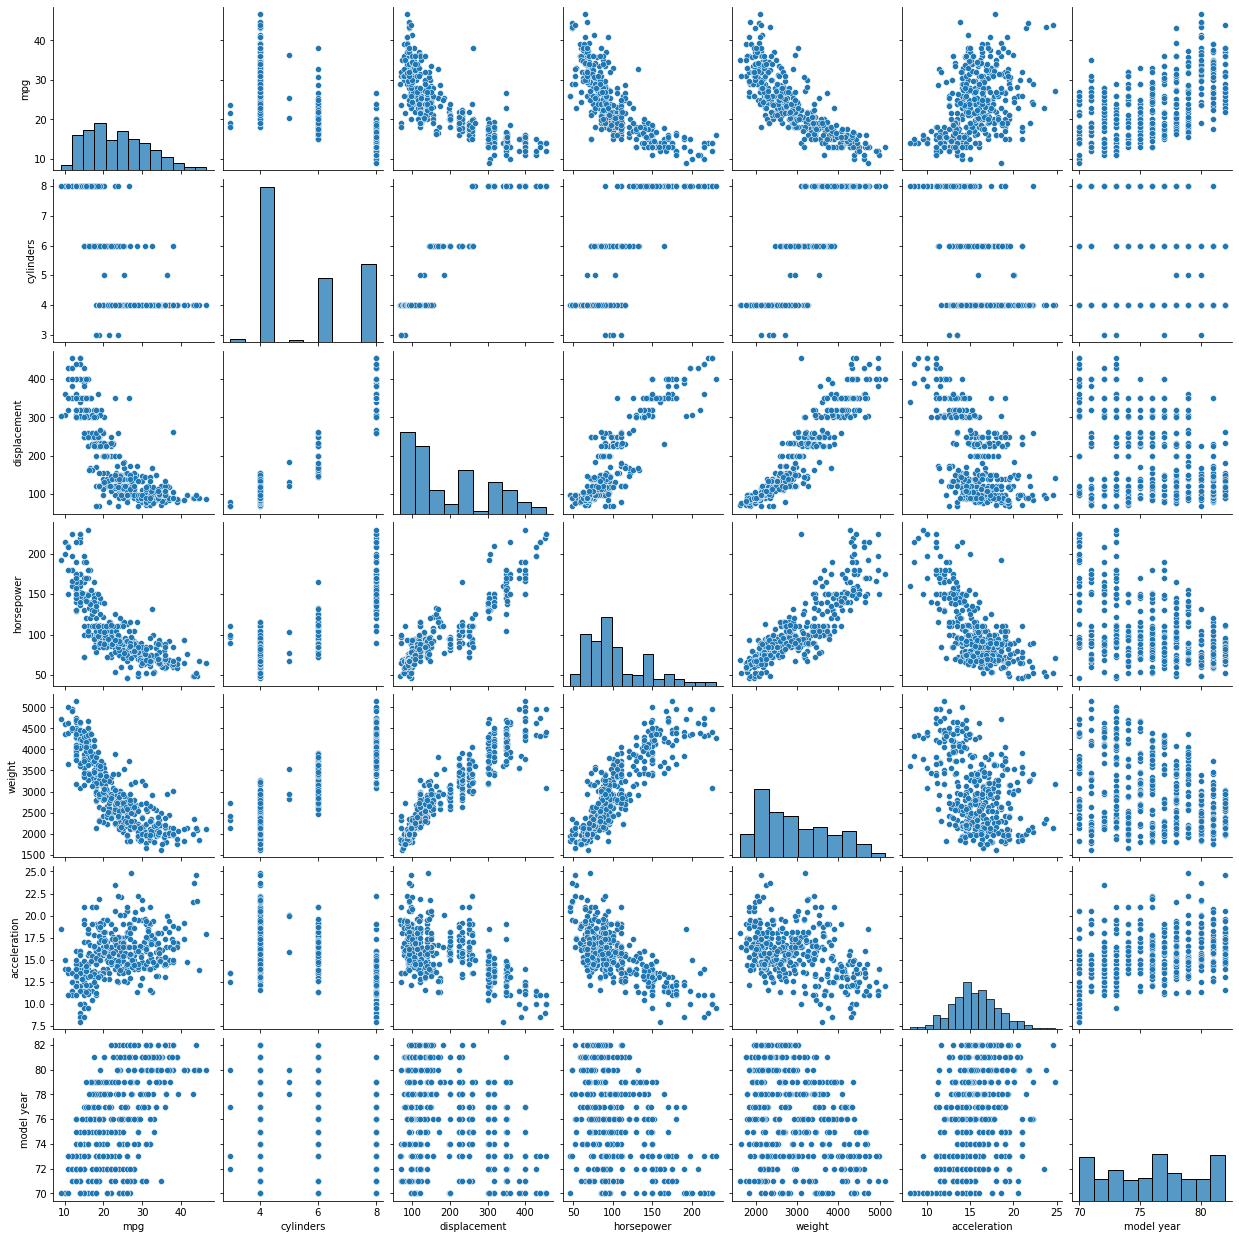

In [ ]:
#Bivariant plot
sns.pairplot(data.iloc[:,0:7])


There seems to be no relation between mpg and model year
But we can see linear relation between different variables

In [ ]:
#correlation
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.433505,-0.373886
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.318972,-0.282877
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
origin_america,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000


cylinder , displacement,horsepower and weight are inversely correlated to mpg


In [ ]:
#splitting the data
y = data['mpg']
x = data.drop('mpg',axis=1)


In [ ]:
#split it to train test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [ ]:
#building the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#coefficient and intercept for each variable can be printed
#m1x1 + m2x2 + m3x3 +c
for i,col in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col, model.coef_[i]))


The coefficient for cylinders is -0.4626069156544382
The coefficient for displacement is 0.029350510425075714
The coefficient for horsepower is -0.007776679495743137
The coefficient for weight is -0.007758806734887512
The coefficient for acceleration is 0.07722509895206742
The coefficient for model year is 0.8288056867405429
The coefficient for origin_america is -2.0012838267615156
The coefficient for origin_asia is 0.9748745744857608
The coefficient for origin_europe is 1.0264092522757549


In [ ]:
model.intercept_

-18.884029869863436

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([19.68815175, 28.52329195, 30.15279859, 21.32999874, 23.84151577,
       15.47699996, 31.26190329, 25.95225244, 33.51530781, 23.54629156,
       10.58554638, 27.83218333, 18.00467172, 23.66509518, 29.53736318,
       13.47250351, 24.4102673 , 23.72562792, 21.78312838, 12.00634584,
       27.81247358, 31.96789529, 23.7122825 , 20.45161829, 17.70745411,
       15.86050951, 21.86353181, 24.95156344, 11.64984903, 14.02122452,
       16.69962453, 34.77133209, 29.42974152, 33.89600986, 36.87229248,
       26.04543982, 35.59299355, 14.18436642, 29.71097698, 31.87823115,
       22.41992183, 27.40586522, 28.75517955, 27.45594622, 25.28647406,
        7.59868502, 19.9621988 , 10.51275961, 35.53751051, 28.47556058,
       32.24967716, 11.84292816, 20.09154745, 11.2704108 , 22.52604188,
       10.78224491, 20.88340396, 20.59476747, 23.5117535 , 28.13283945,
       23.01481682, 17.01286317, 30.03966089, 22.46046549, 26.66434392,
       36.41887807, 18.5608985 , 10.96458455, 18.51685566, 25.84

In [ ]:
model.score(X_test,y_test)

0.8058063776731551

In [ ]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mae)
print('mae : {} , rmse : {}'.format(mae,rmse))

mae : 2.53318102995045 , rmse : 1.5915970061389442
